Aluno: Fernanda Midori Abukawa

nº USP: 9797594

Disciplina: IBI5031 - 2º semestre de 2020

Prof: Marcelo da Silva Reis

Lista 3

utilizados: python3, anaconda3, jupyter notebooks v6.1, macOS, sklearn v0.23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Após aberto o arquivo com o dataset, foi separado os features (X) dos rótulos (y) e o X foi normalizado com a função StandardScaler. Os rótulos 0 do y foram classificados como -1.

In [2]:
#importando o dataset parkinsons.data.csv 
data = pd.read_csv('parkinsons.data.csv', sep = ',')

#tirando a primeira coluna com os nomes dos pacientes
data.drop('name', axis = 1, inplace=True)
y = data['status'].copy()

#trocando o rótulo 0 por -1 
y = y.replace(to_replace = 0, value = -1)
X = data.drop('status', axis = 1).copy()

#numero N de pacientes e n_carac características 
N = len(X)
n_carac = len(data.columns)
print('são %d pontos e %d características' % (N, n_carac))

#normalizar os dados de input 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X normalizado')

são 195 pontos e 23 características
X normalizado


Foi utilizado para cada kernel, a função GridSearchCV para fazer a escolha dos melhores parâmetros para cada SVC(). Na variável 'parameters', tem se os valores testados para cada parâmetro (C, degree, gamma e coef0). Após a escolha do melhor conjunto de parâmetros, foi criado o classificador com os melhores parâmetros e aplicado ao dataset X. Foi medida a acurácia de cada modelo.

### polynomial

In [3]:
parameters = {  'C':[0.001, 0.01, 0.1, 0.5, 1, 10], 
                'degree':[2, 3, 4, 5],
                'gamma':['scale', 0.0001, 0.001, 0.05, 0.01, 0.1, 0.5, 1],
                'coef0': [1, 5, 10]}

clf_poly = SVC(kernel = 'poly')
clf_poly.grid = GridSearchCV(clf_poly, param_grid = parameters, cv = 10, verbose = 0, scoring = 'accuracy')
clf_poly.grid.fit(X_scaled, y)

print('resultado melhores parâmetros:',  clf_poly.grid.best_params_) 

resultado melhores parâmetros: {'C': 10, 'coef0': 5, 'degree': 4, 'gamma': 0.01}


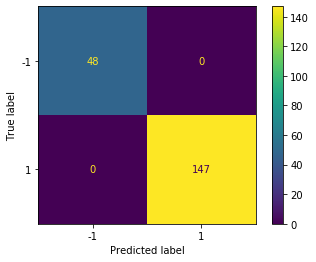

são 195 classificações corretas e 0 erradas
Verdadeiros positivos: 147
Falsos positivos: 0
Verdadeiros negativos: 48
Falsos negativos: 0


o número de suportes vetoriais é 43
Acurácia: 1.000


In [12]:
clf_svm_poly = SVC(kernel = 'poly', C = 10, coef0 = 5, degree = 4, gamma = 0.01)
clf_svm_poly.fit(X_scaled, y)

plot_confusion_matrix(clf_svm_poly, X_scaled, y)
plt.show()

labels = clf_svm_poly.predict(X_scaled)
cm = confusion_matrix(y, labels)
print('são %d classificações corretas e %d erradas' % ((cm[1][1]+cm[0][0]),(cm[0][1]+cm[1][0])))
print('Verdadeiros positivos:' , cm[1][1])
print('Falsos positivos:', cm[0][1])
print('Verdadeiros negativos:' , cm[0][0])
print('Falsos negativos:', cm[1][0])
print('\n')

#para ver os alfas
alphas = abs(clf_svm_poly.dual_coef_)
#pra ver numero de suportes vetoriais 
support_vectors = sum(clf_svm_poly.n_support_)
print('o número de suportes vetoriais é %d' % support_vectors)
print('Acurácia: %.3f' % (accuracy_score(y, labels)))

## Linear

In [6]:
parameters = { 'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100] }

clf_lin = SVC(kernel = 'linear')
clf_lin.grid = GridSearchCV(clf_lin, param_grid = parameters, cv = 10, verbose = 0, scoring = 'accuracy')
clf_lin.grid.fit(X_scaled, y)

print('resultado melhores parâmetros:', clf_lin.grid.best_params_) 

resultado melhores parâmetros: {'C': 0.01}


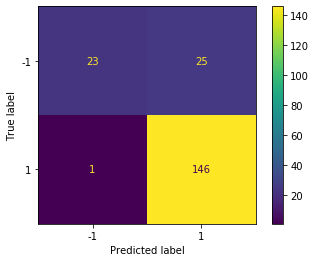

são 169 classificações corretas e 26 erradas
Verdadeiros positivos: 146
Falsos positivos: 25
Verdadeiros negativos: 23
Falsos negativos: 1


o número de suportes vetoriais é 94
Acurácia: 0.867


In [7]:
clf_svm_lin = SVC(kernel = 'linear', C = 0.01)
clf_svm_lin.fit(X_scaled, y)
plot_confusion_matrix(clf_svm_lin, X_scaled, y)
plt.show()

labels = clf_svm_lin.predict(X_scaled)
cm = confusion_matrix(y, labels)
print('são %d classificações corretas e %d erradas' % ((cm[1][1]+cm[0][0]),(cm[0][1]+cm[1][0])))
print('Verdadeiros positivos:' , cm[1][1])
print('Falsos positivos:', cm[0][1])
print('Verdadeiros negativos:' , cm[0][0])
print('Falsos negativos:', cm[1][0])
print('\n')

#para ver os alphas 
alphas = abs(clf_svm_lin.dual_coef_)
#pra ver numero de suportes vetoriais 
support_vectors = sum(clf_svm_lin.n_support_)
print('o número de suportes vetoriais é %d' % support_vectors)
print('Acurácia: %.3f' % ( accuracy_score(y, labels)))

## Radial Basis Function

In [8]:
parameters = {  'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100], 
                'gamma':['scale', 0.0001, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10]}

clf_rbf = SVC(kernel = 'rbf')
clf_rbf.grid = GridSearchCV(clf_rbf, param_grid = parameters, cv = 10, verbose = 0, scoring = 'accuracy')
clf_rbf.grid.fit(X_scaled, y)

print('resultado melhores parâmetros:',  clf_rbf.grid.best_params_) 

resultado melhores parâmetros: {'C': 10, 'gamma': 0.5}


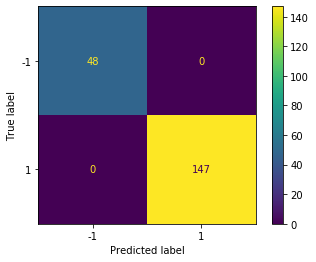

são 195 classificações corretas e 0 erradas
Verdadeiros positivos: 147
Falsos positivos: 0
Verdadeiros negativos: 48
Falsos negativos: 0


o número de suportes vetoriais é 173
Acurácia: 1.000


In [10]:
clf_svm_rbf = SVC(kernel = 'rbf', C = 10.0, gamma = 0.5)
clf_svm_rbf.fit(X_scaled, y)
plot_confusion_matrix(clf_svm_rbf, X_scaled, y)
plt.show()

labels = clf_svm_rbf.predict(X_scaled)
cm = confusion_matrix(y, labels)
print('são %d classificações corretas e %d erradas' % ((cm[1][1]+cm[0][0]),(cm[0][1]+cm[1][0])))
print('Verdadeiros positivos:' , cm[1][1])
print('Falsos positivos:', cm[0][1])
print('Verdadeiros negativos:' , cm[0][0])
print('Falsos negativos:', cm[1][0])
print('\n')

#para ver os alphas 
alphas = abs(clf_svm_rbf.dual_coef_)
#pra ver numero de suportes vetoriais 
support_vectors = sum(clf_svm_rbf.n_support_)
print('o número de suportes vetoriais é %d' % support_vectors)
print('Acurácia: %.3f' % ( accuracy_score(y, labels)))

## sigmoid

In [13]:
parameters = {  'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100], 
                'gamma':['scale', 0.0001, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10],
                'coef0': [1, 5, 10, 50, 100]}

clf_sig = SVC(kernel = 'sigmoid')
clf_sig.grid = GridSearchCV(clf_sig, param_grid = parameters, cv = 10, verbose = 0, scoring = 'accuracy')
clf_sig.grid.fit(X_scaled, y)

print('resultado parâmetros otimizados:',  clf_sig.grid.best_params_) 

resultado parâmetros otimizados: {'C': 10, 'coef0': 1, 'gamma': 0.01}


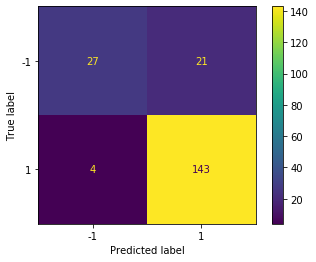

são 170 classificações corretas e 25 erradas
Verdadeiros positivos: 143
Falsos positivos: 21
Verdadeiros negativos: 27
Falsos negativos: 4


o número de suportes vetoriais é 79
Acurácia: 0.872


In [14]:
clf_svm_sig = SVC(kernel = 'sigmoid', C = 10.0, gamma = 0.01, coef0=1)
clf_svm_sig.fit(X_scaled, y)
plot_confusion_matrix(clf_svm_sig, X_scaled, y)
plt.show()

labels = clf_svm_sig.predict(X_scaled)
cm = confusion_matrix(y, labels)
print('são %d classificações corretas e %d erradas' % ((cm[1][1]+cm[0][0]),(cm[0][1]+cm[1][0])))
print('Verdadeiros positivos:' , cm[1][1])
print('Falsos positivos:', cm[0][1])
print('Verdadeiros negativos:' , cm[0][0])
print('Falsos negativos:', cm[1][0])
print('\n')

#para ver os alphas 
alphas = abs(clf_svm_sig.dual_coef_)
#pra ver numero de suportes vetoriais 
support_vectors = sum(clf_svm_sig.n_support_)
print('o número de suportes vetoriais é %d' % support_vectors)
print('Acurácia: %.3f' % ( accuracy_score(y, labels)))

| Modelo|Verdadeiro positivo|Falso positivo|Verdadeiro negativo|Falso negativo|
|-------|-------------------|--------------|-------------------|--------------|
|Polynomial | 147 | 0 | 48 | 0 |
|Radial Basis Function | 147 | 0 | 48 | 0 |
|Sigmoid | 143 | 21 | 27 | 4 |
|Linear | 146 | 23 | 25 | 1 |

| Modelo|Acurácia|Número de Suportes Vetoriais|
|-------|---------|----------------------------|
Polynomial| 1.0 | 43 |
Radial Basis Function | 1.0 | 173 |
Sigmoid | 0.872 | 79 |
Linear | 0.867 | 94 |


O melhor modelo de SVM é o SVM com kernel polinomial, que atingiu acurácia de 1.0 com 43 suportes vetoriais.